# Domain walls

In [1]:
# make sure scipy is available in thebe: numpy and matplotlib available by default
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Module to add Ginzburg-Landau plot

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def glsol(kappa,A,B):
  a,ba,fa=A
  b,bb,fb=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array([Ya[0]-fa, Yb[0]-fb, Ya[3]-ba,Yb[3]-bb])
  rng=[a, b]
  x = np.linspace(*rng, nodes)
  Y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    Y[0,k]=1
  return solve_bvp(dY, bc, x, Y)

def glplot(kappa,A,B,tex):
  sol=glsol(kappa,A,B)
  x_plot = np.linspace(A[0],B[0], 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot,label=f"$f: {tex}$")
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot,label=f"$b: {tex}$")
  return 0


## Plots with varying $\kappa$

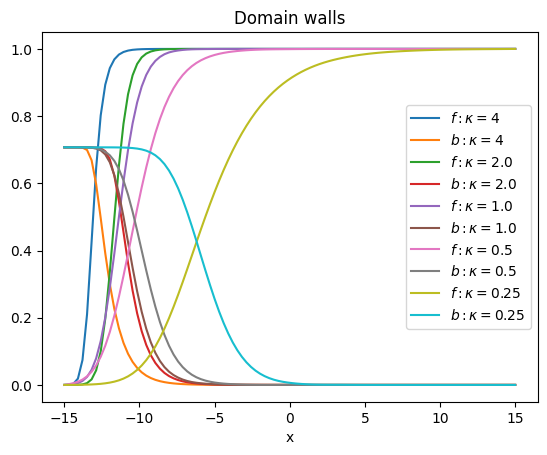

In [11]:
kappa=4
hc=1/(2**(1/2)) # critical field
a,b=-15,15 # range needs to be adjusted just right for smooth curves (too short) or type-II switching (too long, high-kappa)
A=(a,hc,0)
B=(b,0,1)
while kappa>1/8:
  gl(kappa,A,B,f"\kappa={kappa}")
  kappa/=2
plt.xlabel("x")
plt.title(f"Domain walls")
plt.legend()
plt.show()

## Domain wall energy

In [9]:
# to come